# MachineLearning : Logistic Regression

In [ ]:
# library import
# 데이터 임포트
import pandas as pd
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/train.csv')
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/test.csv')


In [2]:
# 특성 개수 
print("훈련 데이터 특성 개수: ", train.shape[1])
print("테스트 데이터 특성 개수: ", test.shape[1])

훈련 데이터 특성 개수:  12
테스트 데이터 특성 개수:  11


In [4]:
# 테스트 세트에 없는 타겟 특성 확인
# test에는 타겟 컬럼이 들어가 있으면 안된다!
print("타겟 열: ", train.columns.difference(test.columns)[0])

# 1개 이상싀 특성 수 차 있을 경우 
#print("타겟 열: ", train.columns.difference(test.columns))

타겟 열:  Survived


In [18]:
# 타겟 정의
train.head(1)

# age: 결측치


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# EDA

In [20]:
# 컬럼명 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# EDA
# 
import pandas as pd

def unique_counts(df):
    unique_counts_dict = {}
    for col in df.columns:
        unique_counts_dict[col] = df[col].value_counts()
    return unique_counts_dict

result = unique_counts(train)
for col, counts in result.items():
    print(f"컬럼: {col}")
    print(counts)
    print()

# 불필요 : PassengerId, Name, Cabin
# target : Survived 
# feature : Pclass, Sex, Age, Parch, Fare, Embarked
# sub feature : SibSp, Parch

# 범주형 데이터로 구분이 가능한지
# 고루 분포가 되어 있는지


In [ ]:
# unique values
train['Pclass'].unique()

# value_counts

In [ ]:
print(train.describe())

In [ ]:
print(train.info())


In [21]:
# target, features 정의

target = 'Survived'
features = train.columns.difference(['PassengerId','Survived','Name','Ticket','Cabin'])


In [23]:
X = train[features]
y = train[target]

In [25]:
X

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,S,7.2500,0,3,male,1
1,38.0,C,71.2833,0,1,female,1
2,26.0,S,7.9250,0,3,female,0
3,35.0,S,53.1000,0,1,female,1
4,35.0,S,8.0500,0,3,male,0
...,...,...,...,...,...,...,...
886,27.0,S,13.0000,0,2,male,0
887,19.0,S,30.0000,0,1,female,0
888,NaN,S,23.4500,2,3,female,1
889,26.0,C,30.0000,0,1,male,0


---

## One hot encoding


실제 데이터 컬럼  

| 색상  |
|-------|
| 빨강  |
| 초록  |
| 파랑  |

원핫인코딩을 적용 후

| 색상  | 빨강  | 초록  | 파랑  |
|-------|-------|-------|-------|
| 빨강  | 1     | 0     | 0     |
| 초록  | 0     | 1     | 0     |
| 파랑  | 0     | 0     | 1     |

.get_dummies()

In [26]:
#판다스 import
data = pd.DataFrame({'색상':['빨강','초록','파랑']})
df = pd.DataFrame(data)

In [29]:
OHE_df = pd.get_dummies(df)
print(OHE_df)

   색상_빨강  색상_초록  색상_파랑
0   True  False  False
1  False   True  False
2  False  False   True


In [28]:
df

,색상
0,빨강
1,초록
2,파랑


---

In [30]:
X = pd.get_dummies(X)

In [31]:
X

,Age,Fare,Parch,Pclass,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,7.2500,0,3,1,False,False,True,False,True
1,38.0,71.2833,0,1,1,True,False,False,True,False
2,26.0,7.9250,0,3,0,False,False,True,True,False
3,35.0,53.1000,0,1,1,False,False,True,True,False
4,35.0,8.0500,0,3,0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,2,0,False,False,True,False,True
887,19.0,30.0000,0,1,0,False,False,True,True,False
888,NaN,23.4500,2,3,1,False,False,True,True,False
889,26.0,30.0000,0,1,0,True,False,False,False,True


---

## 훈련데이터와 검증데이터 분할

In [33]:
# 라이브러리 임포트 
from sklearn.model_selection import train_test_split

In [34]:
#훈련, 검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 결측값 처리

`SimpleImputer` 전처리 단계중에 하나 이고 결측값을 처리한다

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # 객체를 생성
X_train_imputer = imputer.fit_transform(X_train) # 훈련 100- > 80
X_val_imputer = imputer.fit_transform(X_val)

---

# 특성 스케일링
- 각 컬럼 수치형 데이터들의 범주를 0~1 표준화 (평균 0, 표준편차 1)
- 특정 컬럼에 편향되지 않는다

# 표준화가 필요한 이유
- 모델 성능이 향상
- 학습속도 빨라짐
- 동등한 중요도를 반영

In [ ]:
# 라이브러리 임포트
# 표준화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputer)
X_val_scaled = scaler.transform(X_val_imputer)

-----
# 모델 학습

In [37]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 모델의 데이터 형태
# 입력데이터의 형태 : 수치형
# 출력데이터의 형태 : 범주형 (0,1)
model = LogisticRegression(random_state= 42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [38]:
y_pred = model.predict(X_val_scaled)
print(y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


# 혼동행렬표 : 머신러닝 예측 성능 측정


In [39]:
# 라이브러리 임포트
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

In [40]:
# 검증값과 예측값 간 차이 확인
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

In [41]:
print('accuracy : ', accuracy)
print('precision : ', precision)
print('recall : ', recall)
print('f1 : ', f1)

accuracy :  0.8100558659217877
precision :  0.7857142857142857
recall :  0.7432432432432432
f1 :  0.7638888888888888


결과 분석

이 성능 결과는 분류 모델의 예측 성능을 평가하는 주요 지표인 **정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1 스코어(F1 score)**를 보여줍니다. 각 지표의 의미와 이 결과를 해석하는 방법은 다음과 같습니다.

### 1. **정확도(Accuracy)**: 0.81
   - **정확도**는 전체 샘플 중에서 **올바르게 예측된 비율**을 의미합니다.
   - 여기서는 0.81, 즉 81%의 샘플을 올바르게 예측했음을 나타냅니다.
   - 그러나 정확도는 클래스 불균형이 심할 때는 신뢰하기 어려운 지표입니다. 예를 들어, 대부분의 샘플이 한쪽 클래스에 치우쳐 있을 경우, 단순히 많은 클래스에 예측을 집중시켜 높은 정확도를 얻을 수 있습니다.

### 2. **정밀도(Precision)**: 0.79
   - **정밀도**는 **양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율**입니다.
   - 모델이 양성이라고 예측한 샘플이 실제 양성일 가능성을 의미합니다.
   - 여기서는 약 0.79로, 양성 예측의 약 79%가 실제로 맞았음을 의미합니다.
   - 정밀도는 **잘못된 양성 예측(False Positive)**를 줄이는 것이 중요한 경우에 유용한 지표입니다. 예를 들어, 의료 진단에서 긍정 판정이 정확해야 할 때 정밀도가 중요합니다.

### 3. **재현율(Recall)**: 0.74
   - **재현율**은 **실제 양성 샘플 중에서 모델이 양성으로 올바르게 예측한 비율**입니다.
   - 실제로 양성인 샘플을 놓치지 않고 잡아내는 능력을 의미합니다.
   - 여기서는 약 0.74로, 실제 양성 샘플의 74%를 올바르게 예측했음을 나타냅니다.
   - 재현율은 **잘못된 음성 예측(False Negative)**를 줄이는 것이 중요한 경우에 유용합니다. 예를 들어, 암 진단에서 음성을 잘못 예측하는 것을 최소화하는 것이 중요할 때 재현율이 중요합니다.

### 4. **F1 스코어(F1 Score)**: 0.76
   - **F1 스코어**는 **정밀도와 재현율의 조화 평균**으로, 이 둘의 균형을 고려한 지표입니다.
   - 정밀도와 재현율 간의 **균형을 맞추는 데 유용**하며, 특히 두 지표의 값이 비슷할 때 F1 스코어가 높은 모델이 좋은 성능을 낸다고 판단할 수 있습니다.
   - 여기서는 0.76으로, 모델이 정밀도와 재현율에서 어느 정도 균형을 맞추고 있다고 볼 수 있습니다.

### 종합적인 해석:
- 이 모델은 **전체적으로 81%의 정확도를 달성**했으며, 정밀도(0.79)와 재현율(0.74) 사이의 균형도 괜찮은 편입니다.
- **정밀도와 재현율이 1에 가까운 고정밀 모델은 아니지만**, 두 지표 간 큰 차이가 없으므로 **양성 예측과 음성 예측 모두에서 어느 정도 신뢰할 만한 결과**를 보여줍니다.
- **F1 스코어가 0.76**이므로, 정밀도와 재현율을 균형 있게 고려하는 것이 중요한 경우에는 이 모델이 적절하다고 판단할 수 있습니다.

이러한 성능을 바탕으로, 만약 정밀도와 재현율 중 한쪽이 더 중요한 상황이라면 해당 지표를 개선하는 방향으로 모델을 추가 조정할 수 있습니다.

---

Q. 로지스틱에서 출력 데이터가 범주형 데이터라고 했는데, 범주형 데이터를 어떻게 확인할 수 있나요?

In [42]:
# 임포트
from sklearn.metrics import confusion_matrix

In [43]:
# 검증값, 예측값 혼동행렬
cm = confusion_matrix(y_val, y_pred)

In [44]:
cm

array([[90, 15],
       [19, 55]], dtype=int64)

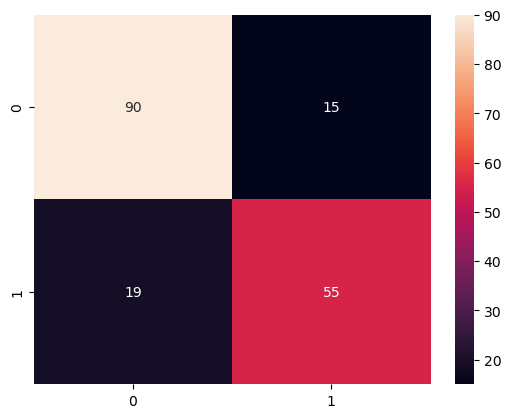

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.show()